<a href="https://colab.research.google.com/github/westinperry/westinperry/blob/main/housing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

files.upload()

Saving housing_data.csv to housing_data (1).csv


{'housing_data (1).csv': b'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice\n1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,V

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('housing_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
numerical_features = ["SalePrice","LotArea","OverallQual",
                      "OverallCond","YearBuilt","1stFlrSF",
                      "2ndFlrSF","BedroomAbvGr"]

In [ ]:
categorical_features = ["MSZoning","LotShape","Neighborhood",
                      "CentralAir","SaleCondition","MoSold",
                      "YrSold"]

In [ ]:
df = df[numerical_features + categorical_features]

In [ ]:
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: >

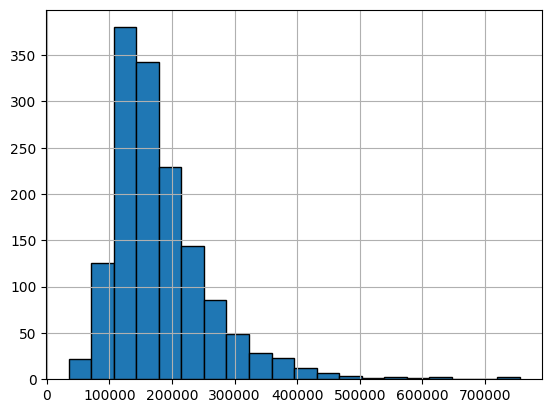

In [ ]:
df["SalePrice"].hist(bins=20, edgecolor='black')

In [ ]:
df[numerical_features].describe()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,6.099315,5.575342,1971.267808,1162.626712,346.992466,2.866438
std,79442.502883,9981.264932,1.382997,1.112799,30.202904,386.587738,436.528436,0.815778
min,34900.000000,1300.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,0.000000
25%,129975.000000,7553.500000,5.000000,5.000000,1954.000000,882.000000,0.000000,2.000000
50%,163000.000000,9478.500000,6.000000,5.000000,1973.000000,1087.000000,0.000000,3.000000
75%,214000.000000,11601.500000,7.000000,6.000000,2000.000000,1391.250000,728.000000,3.000000
max,755000.000000,215245.000000,10.000000,9.000000,2010.000000,4692.000000,2065.000000,8.000000


array([[<Axes: title={'center': 'SalePrice'}>,
        <Axes: title={'center': 'LotArea'}>],
       [<Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>]], dtype=object)

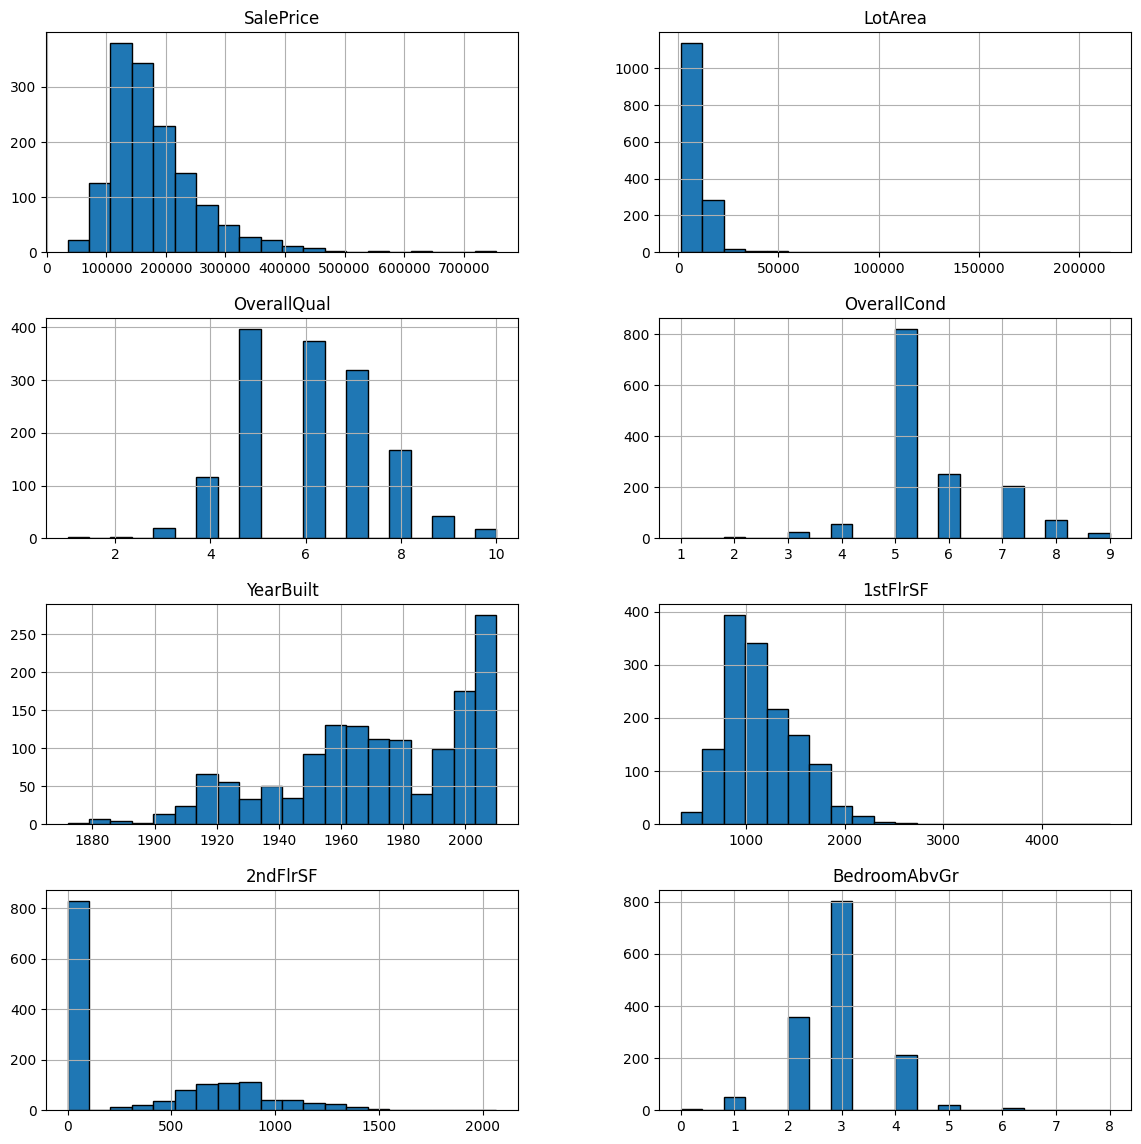

In [ ]:
df[numerical_features].hist(edgecolor='black', bins=20, figsize=(14,14),layout=(4,2))

In [ ]:
df["AgeWhenSold"] = df['YrSold'] - df['YearBuilt']

In [ ]:
numerical_features.append('AgeWhenSold')

array([[<Axes: title={'center': 'SalePrice'}>,
        <Axes: title={'center': 'LotArea'}>],
       [<Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>],
       [<Axes: title={'center': 'AgeWhenSold'}>, <Axes: >]], dtype=object)

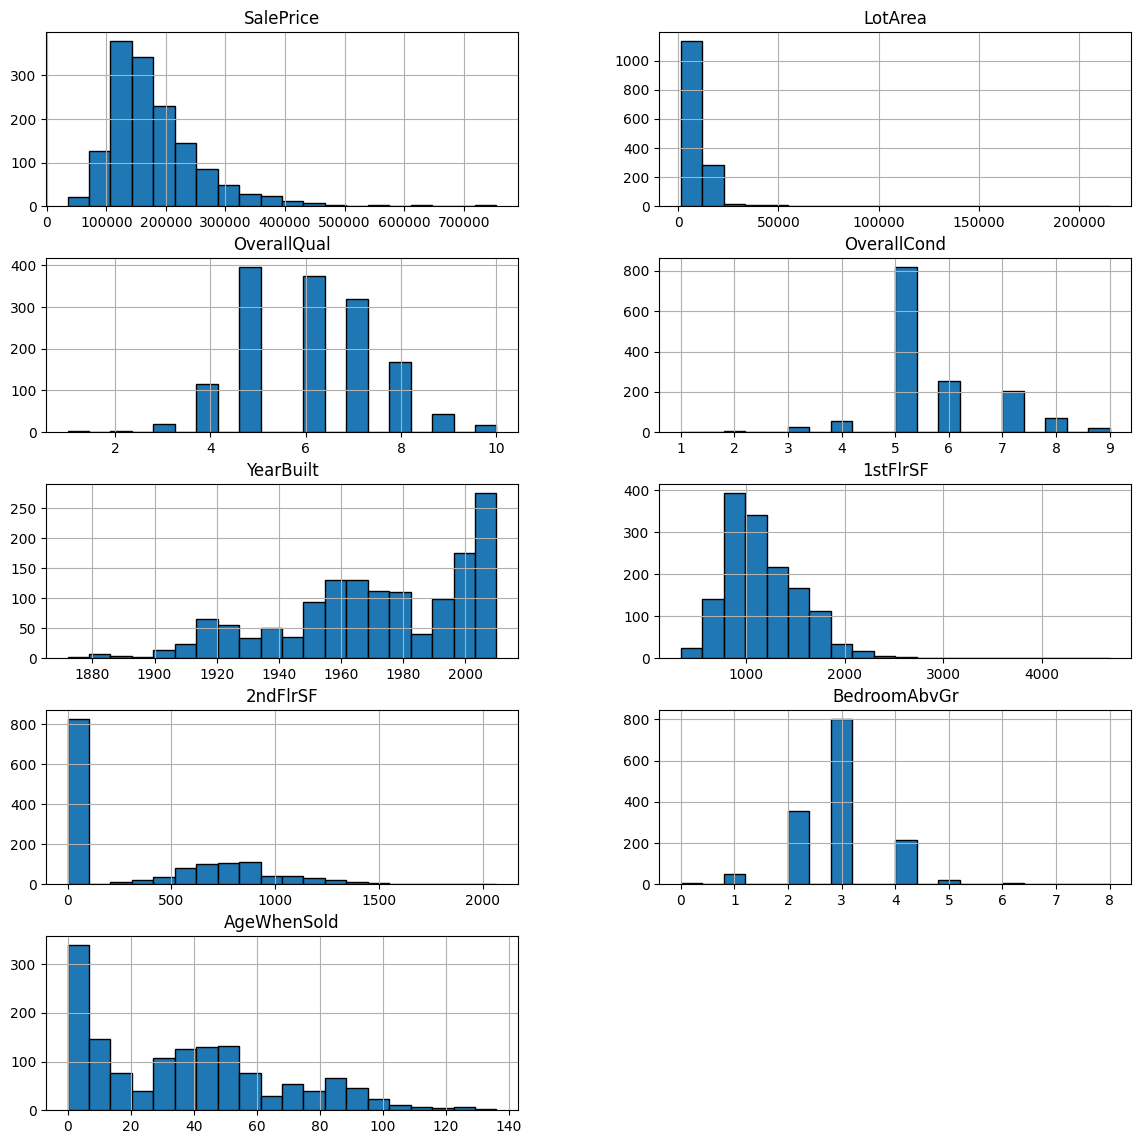

In [ ]:
df[numerical_features].hist(edgecolor='black', bins=20, figsize=(14,14),layout=(5,2))

<Axes: title={'center': 'MSZoning'}>

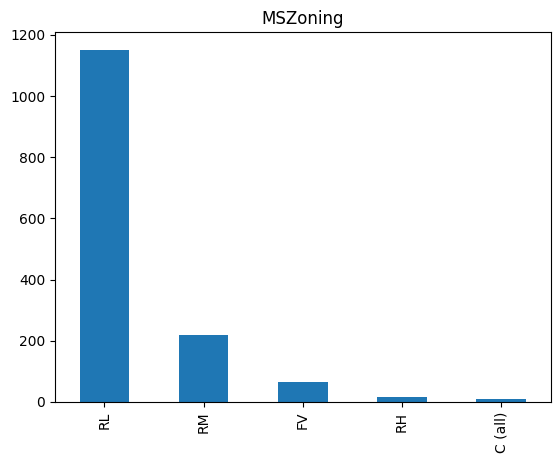

In [ ]:
df['MSZoning'].value_counts().plot(kind='bar', title='MSZoning')

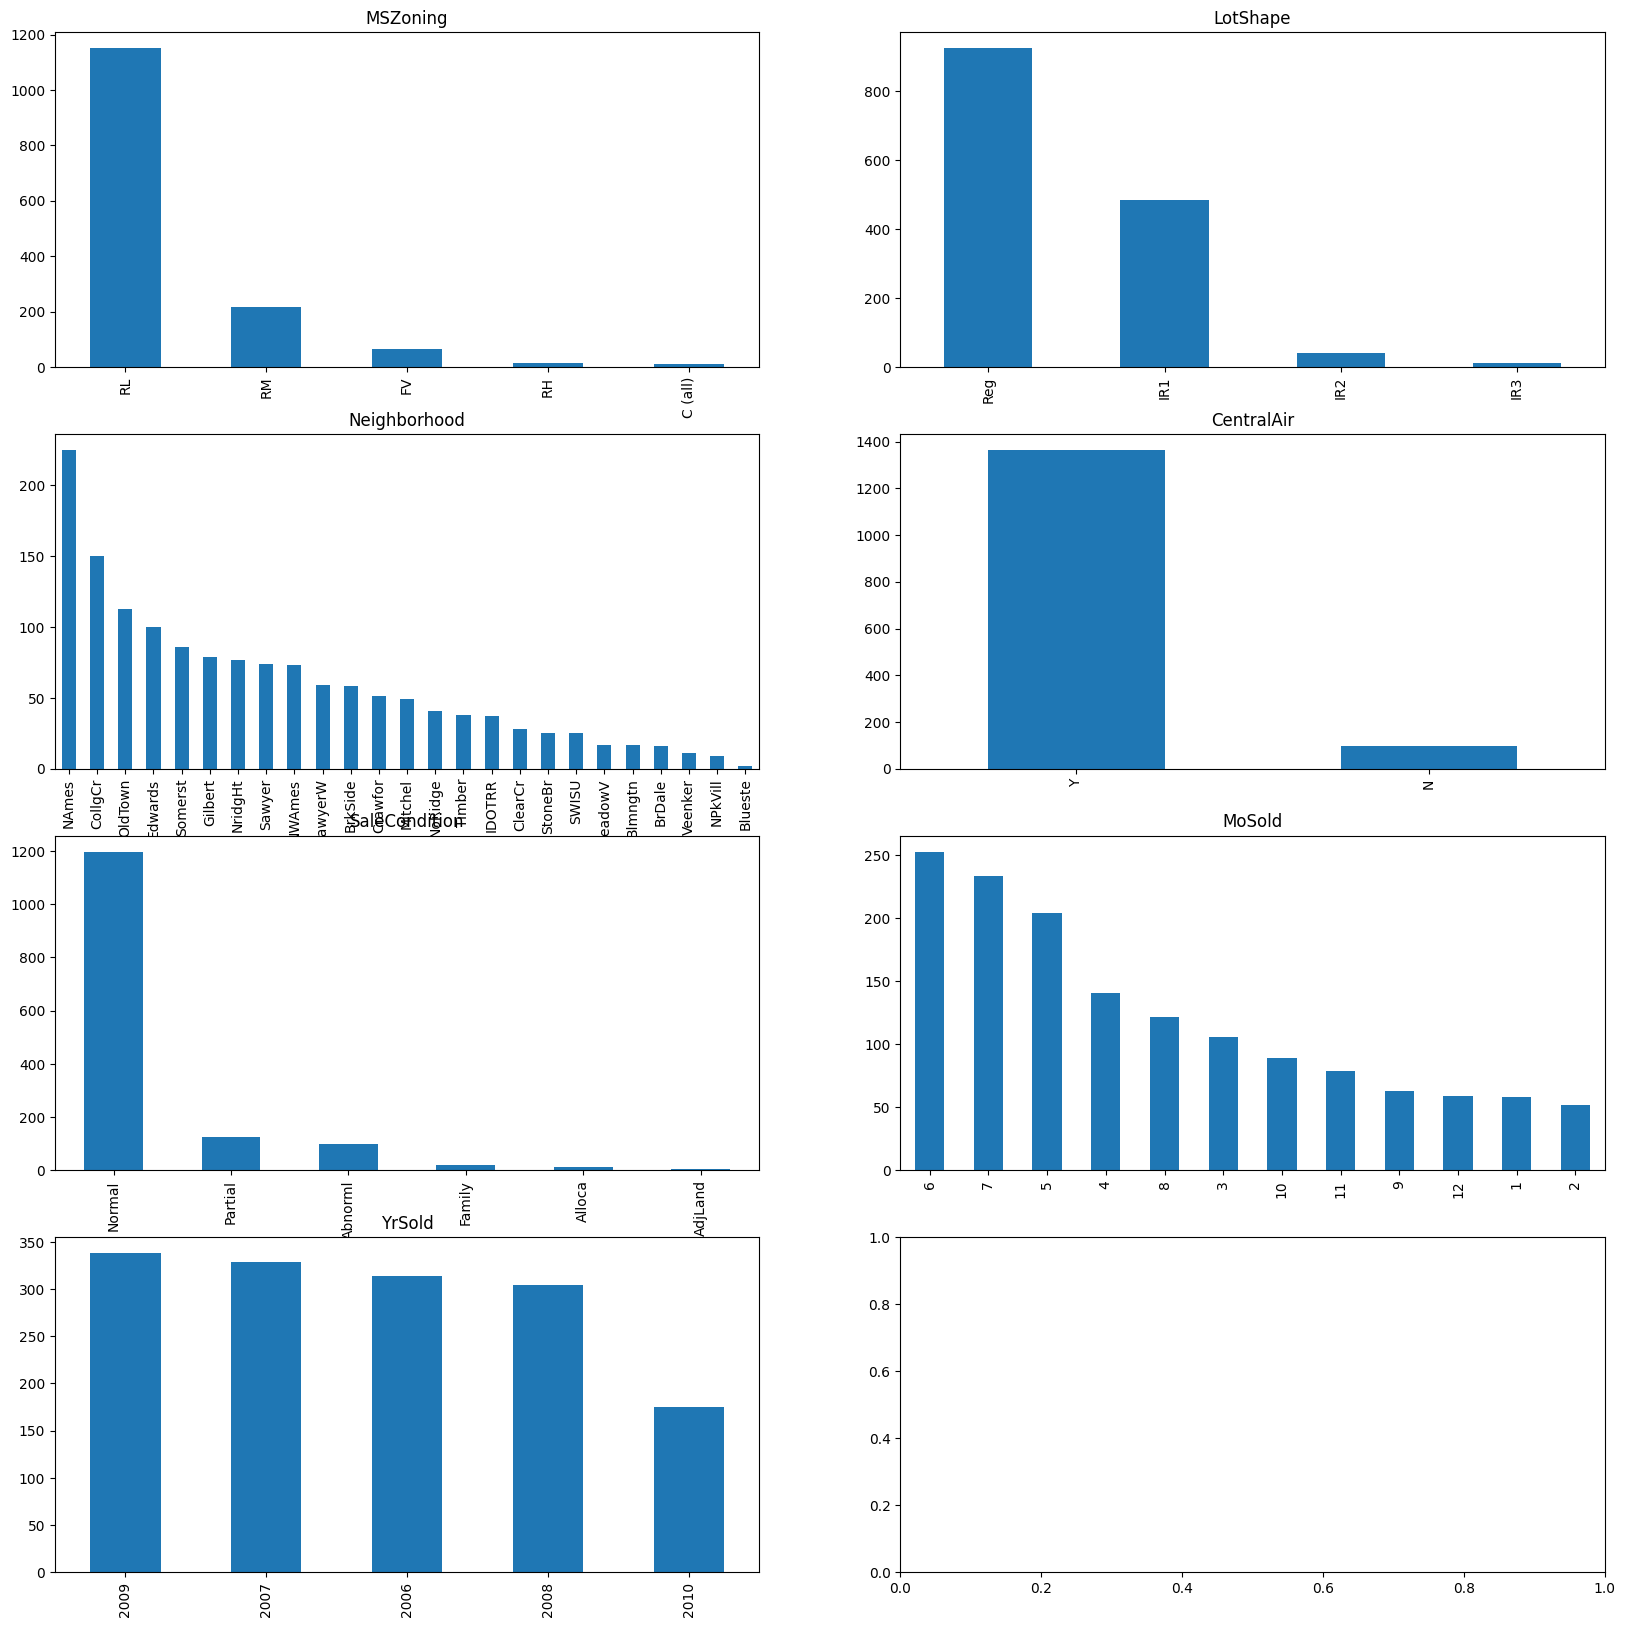

In [ ]:
import matplotlib.pyplot as pyplot

figure, axis = pyplot.subplots(4,2,
                              figsize=(20,20))

for feature, subplot in zip(categorical_features, axis.flatten()):
  df[feature].value_counts().plot(kind='bar',
                                  ax=subplot,
                                  title=feature)

In [ ]:
def identify_above30(series):

  counts = series.value_counts()

  return list(counts[counts >= 30].index)


to_keep = df[categorical_features].apply(identify_above30,
                                          axis=0)

for feature in categorical_features:
  df = df.loc[df[feature].isin(to_keep[feature])]

df.shape

(1218, 16)

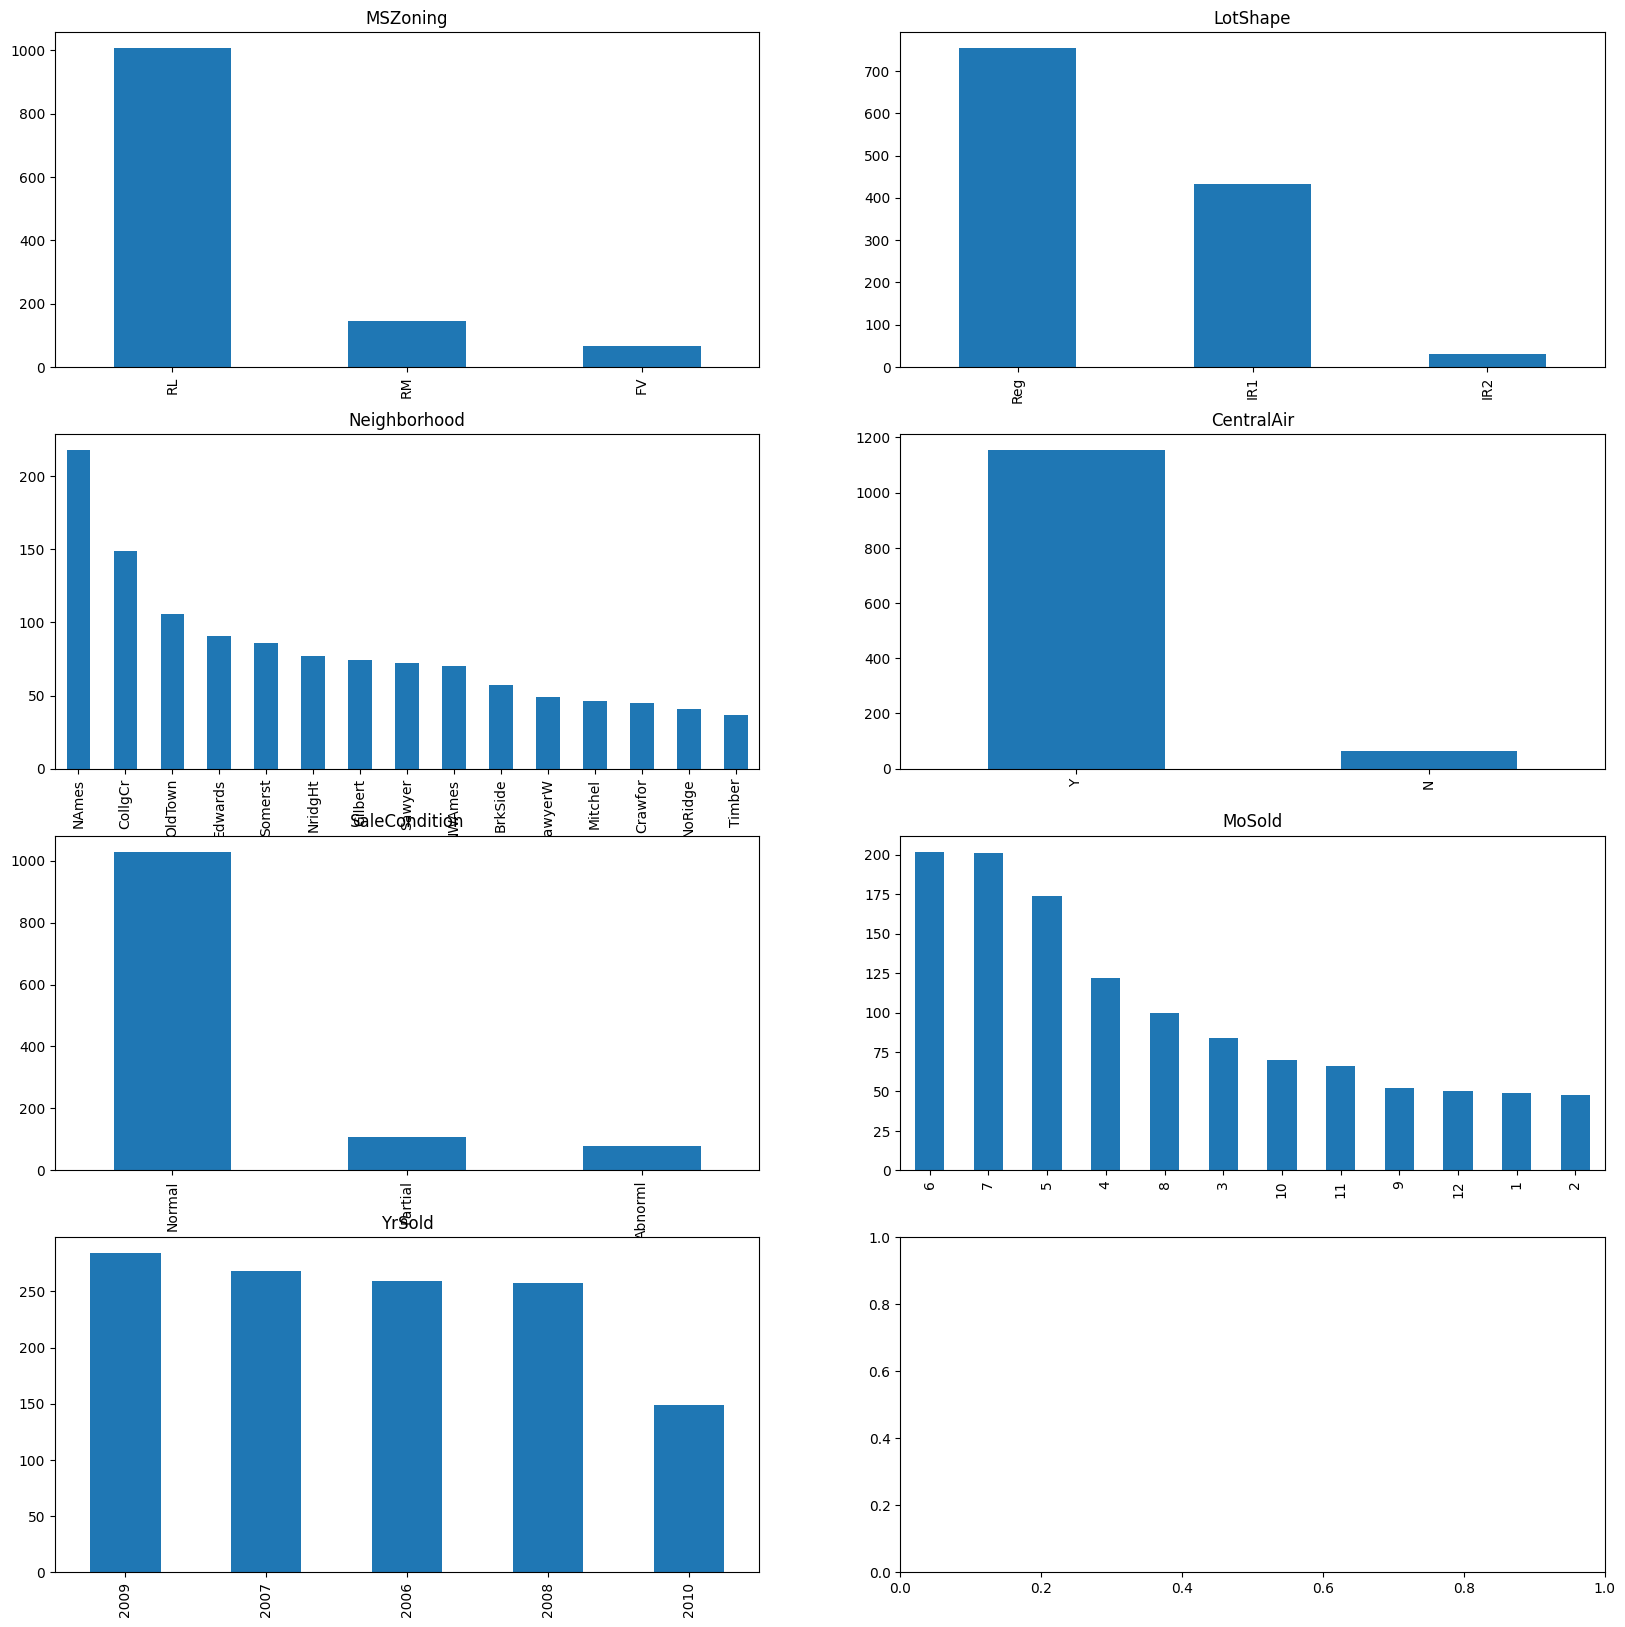

In [ ]:
figure, axis = pyplot.subplots(4,2,
                              figsize=(20,20))

for feature, subplot in zip(categorical_features, axis.flatten()):
  df[feature].value_counts().plot(kind='bar',
                                  ax=subplot,
                                  title=feature)

<Axes: xlabel='LotArea', ylabel='SalePrice'>

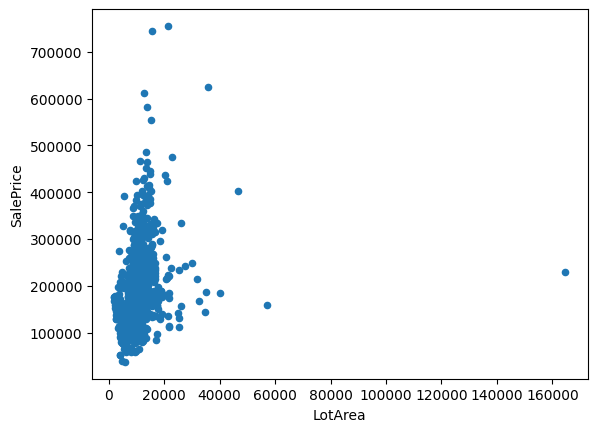

In [ ]:
df.plot.scatter(x='LotArea',y='SalePrice')

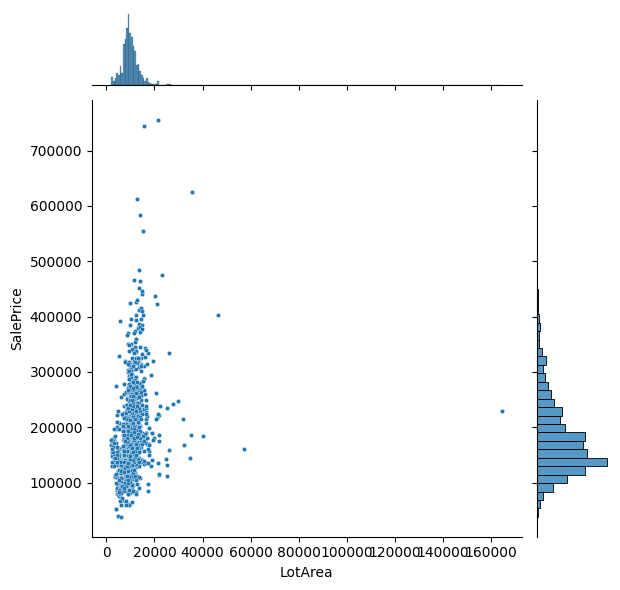

In [ ]:
import seaborn as sb

sb.jointplot(x='LotArea',y='SalePrice', data=df, joint_kws={'s':10})

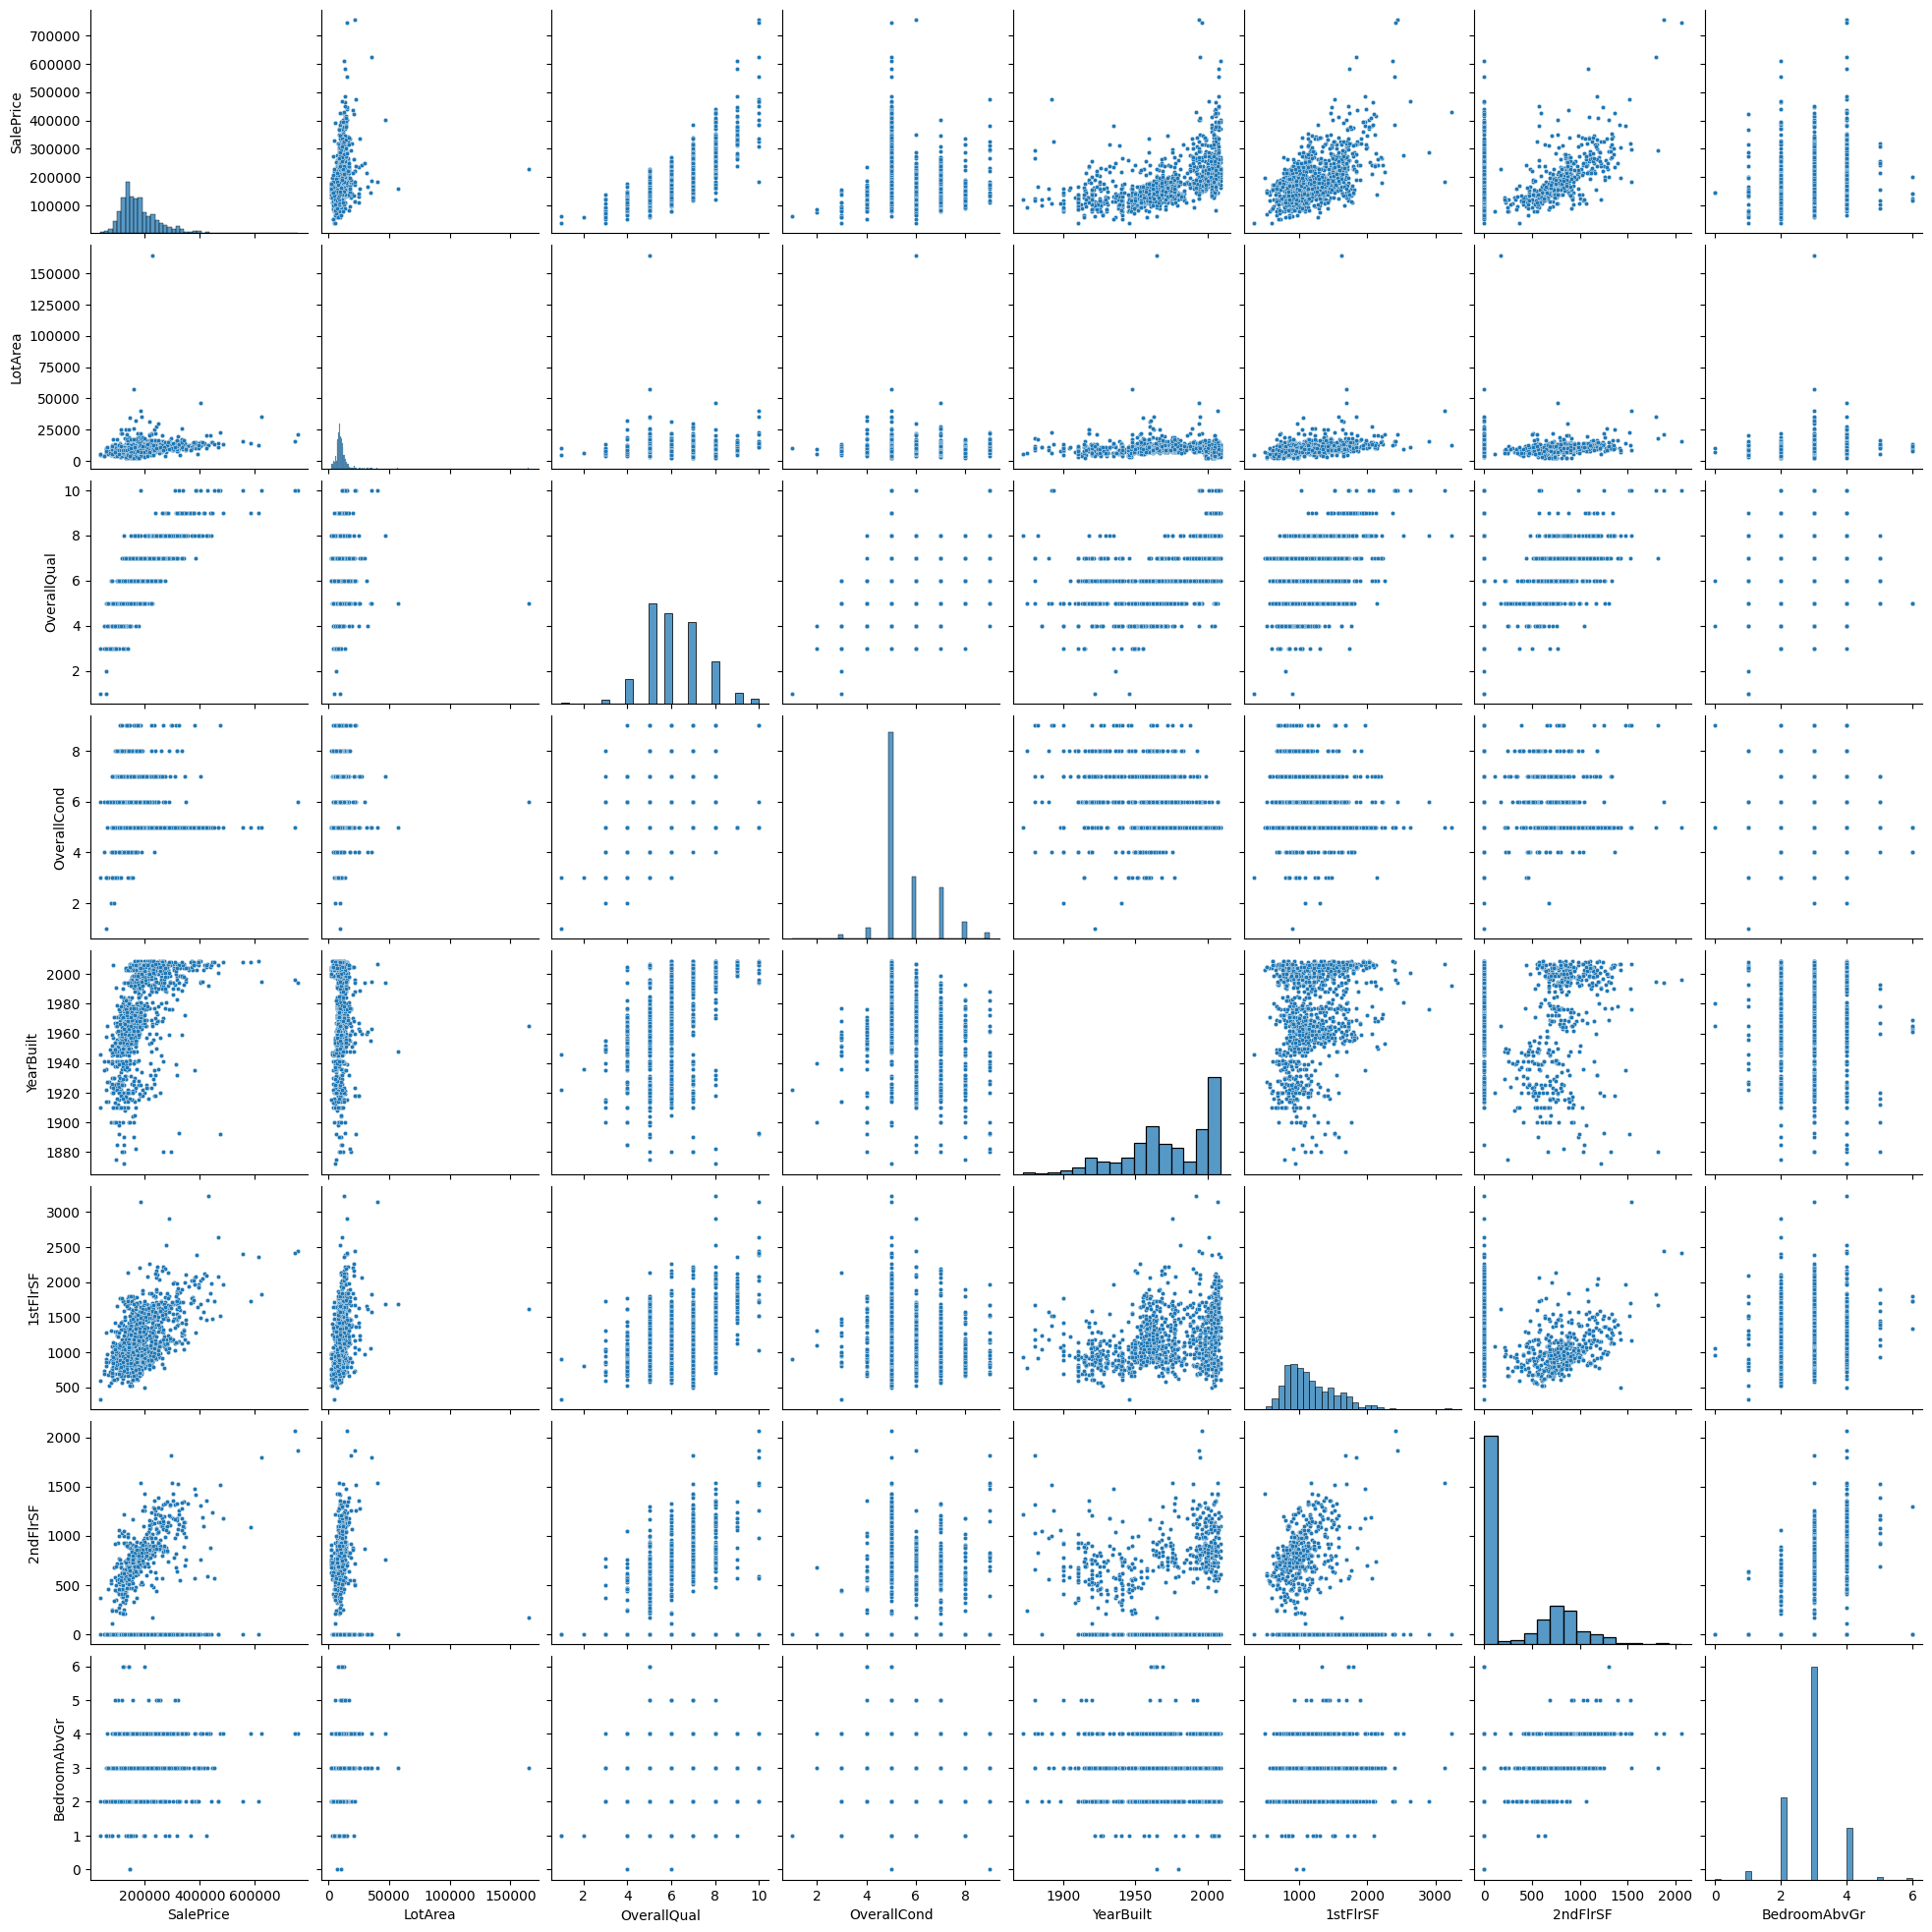

In [ ]:
sb.pairplot(df[numerical_features[:8]],plot_kws={'s':10})

In [ ]:
df[numerical_features].corr()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr,AgeWhenSold
SalePrice,1.000000,0.257231,0.803245,-0.101917,0.519181,0.605532,0.356182,0.213151,-0.519183
LotArea,0.257231,1.000000,0.113239,-0.018303,0.024526,0.312906,0.069757,0.186816,-0.024954
OverallQual,0.803245,0.113239,1.000000,-0.113654,0.565179,0.454466,0.347414,0.157272,-0.565457
OverallCond,-0.101917,-0.018303,-0.113654,1.000000,-0.426981,-0.150960,0.006680,-0.020275,0.428519
YearBuilt,0.519181,0.024526,0.565179,-0.426981,1.000000,0.259726,0.048820,-0.013404,-0.999023
1stFlrSF,0.605532,0.312906,0.454466,-0.150960,0.259726,1.000000,-0.215834,0.154171,-0.259183
2ndFlrSF,0.356182,0.069757,0.347414,0.006680,0.048820,-0.215834,1.000000,0.483379,-0.050178
BedroomAbvGr,0.213151,0.186816,0.157272,-0.020275,-0.013404,0.154171,0.483379,1.000000,0.012926
AgeWhenSold,-0.519183,-0.024954,-0.565457,0.428519,-0.999023,-0.259183,-0.050178,0.012926,1.000000


In [ ]:
df[numerical_features].corr()['SalePrice'].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.803245
1stFlrSF        0.605532
YearBuilt       0.519181
2ndFlrSF        0.356182
LotArea         0.257231
BedroomAbvGr    0.213151
OverallCond    -0.101917
AgeWhenSold    -0.519183
Name: SalePrice, dtype: float64

<Axes: >

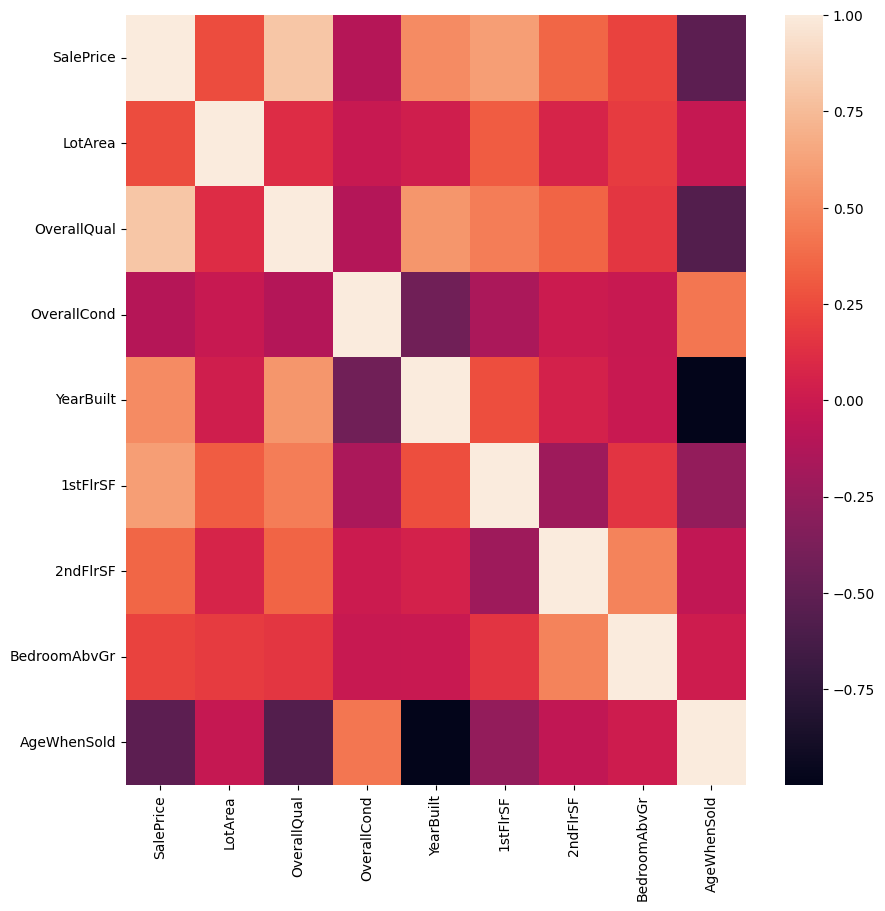

In [ ]:
correlations = df[numerical_features].corr()

figure, axis = pyplot.subplots(figsize=(10,10))

sb.heatmap(correlations, ax = axis)

<Axes: xlabel='SaleCondition', ylabel='SalePrice'>

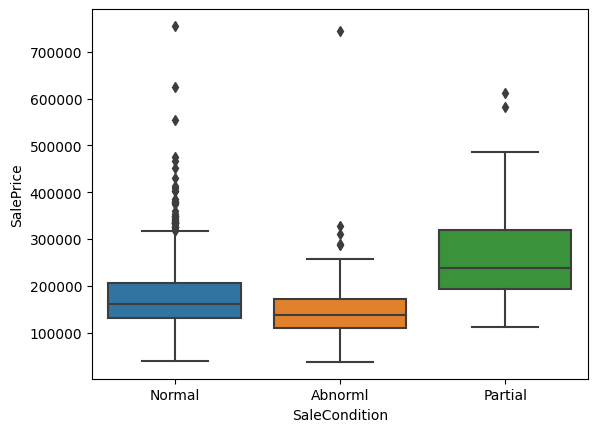

In [ ]:
sb.boxplot(x='SaleCondition',
           y='SalePrice',
           data = df)

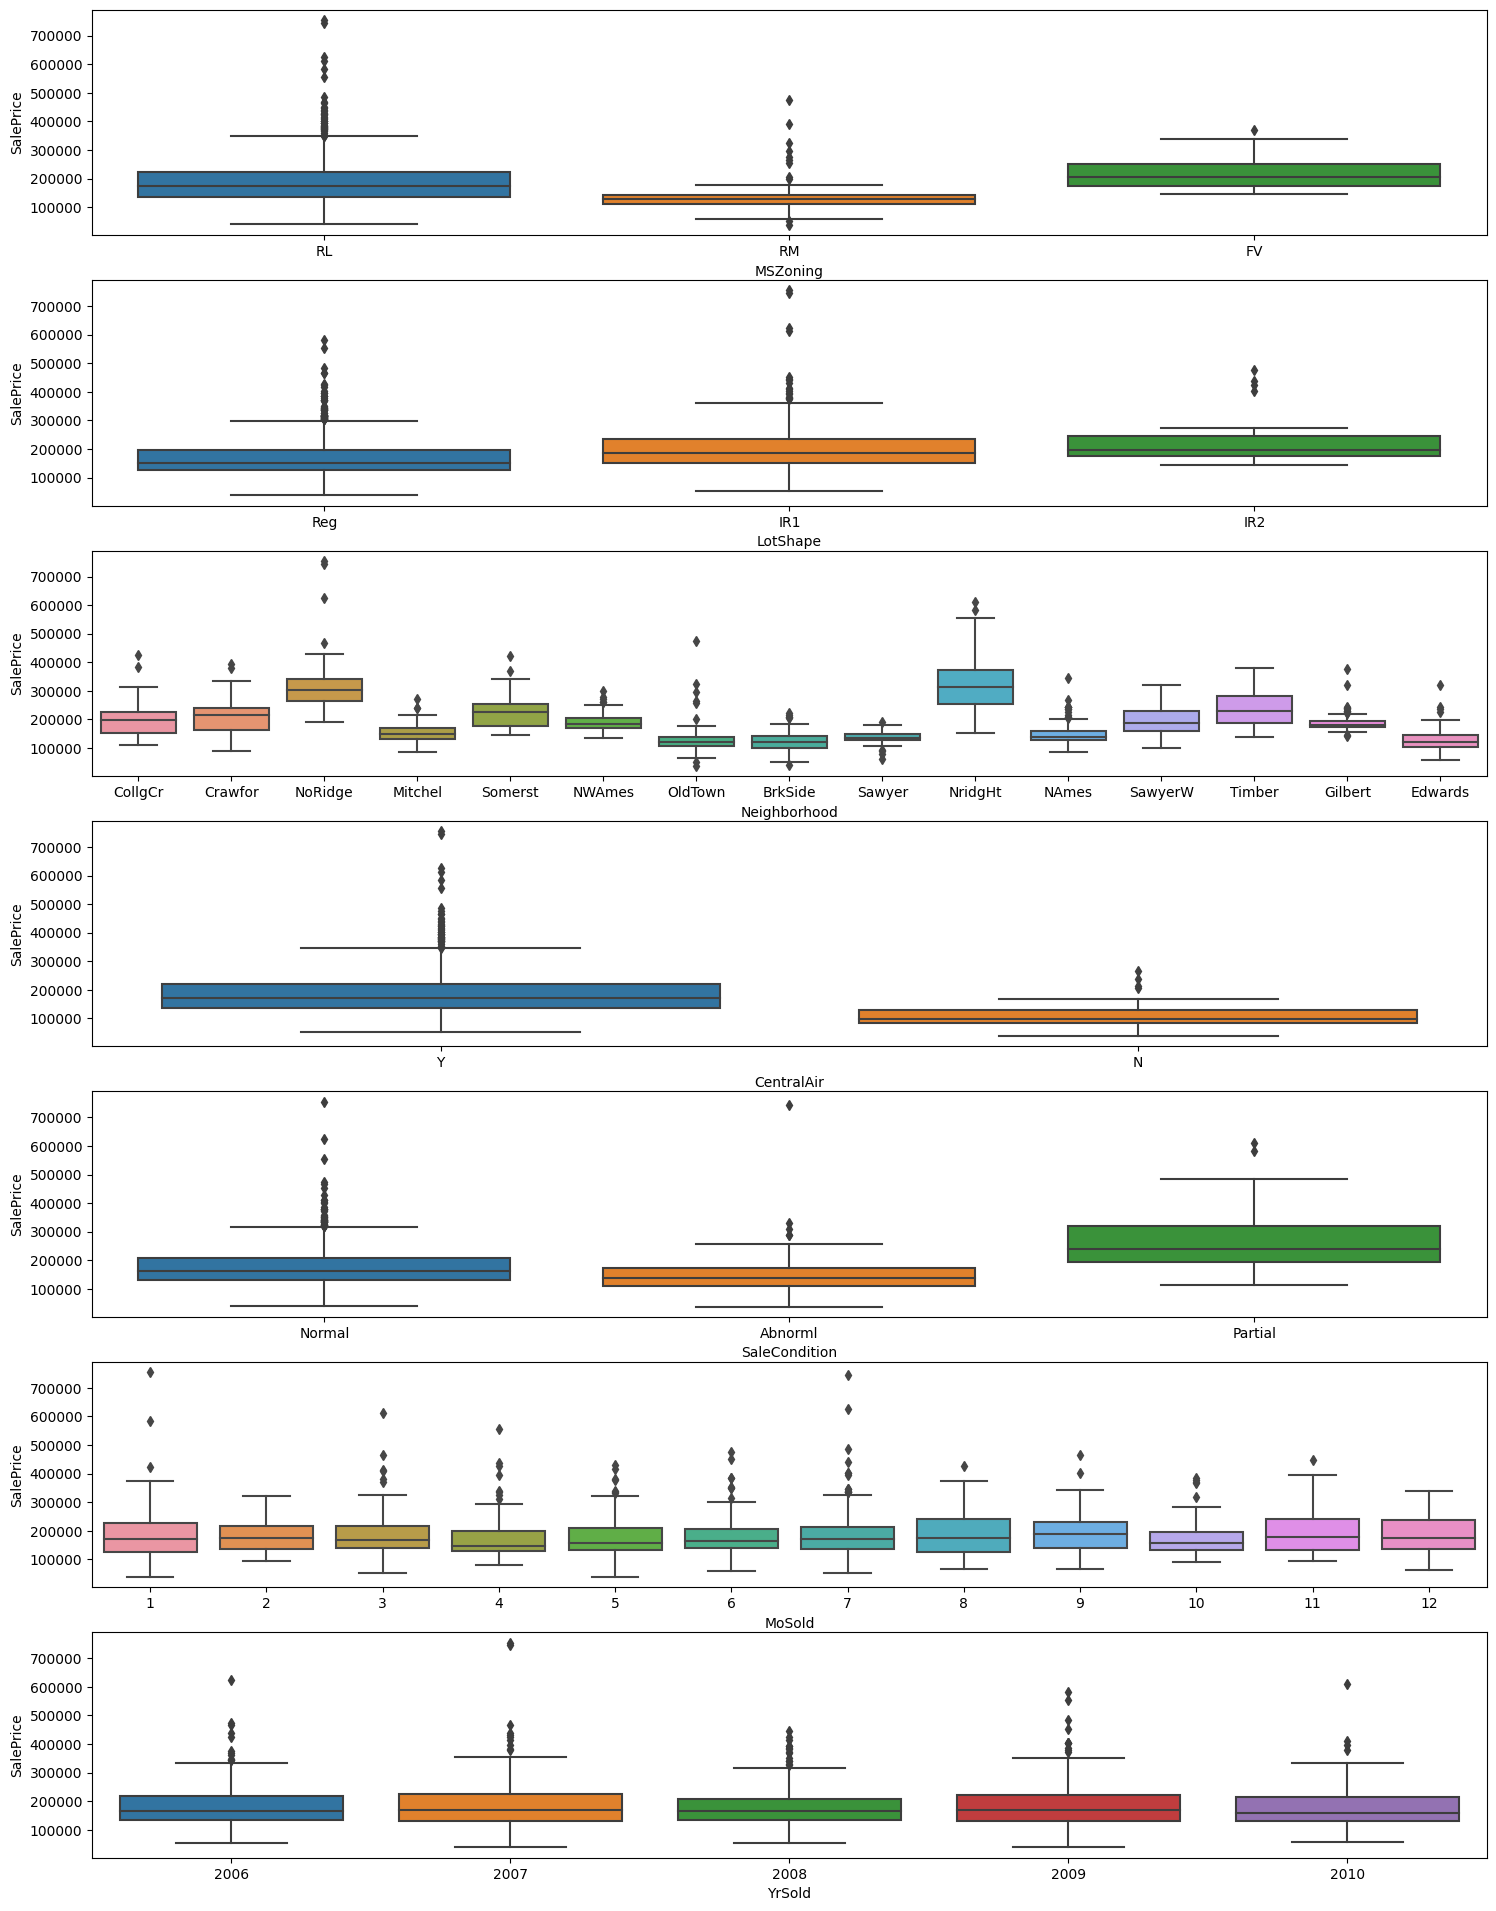

In [ ]:
figurem, axis = pyplot.subplots(7, 1,
                figsize=(18,24))

for feature, subplot in zip(categorical_features, axis.flatten()):

  sb.boxplot(x=feature,
             y='SalePrice',
             data=df,
             ax=subplot)


<Axes: xlabel='MoSold', ylabel='SalePrice'>

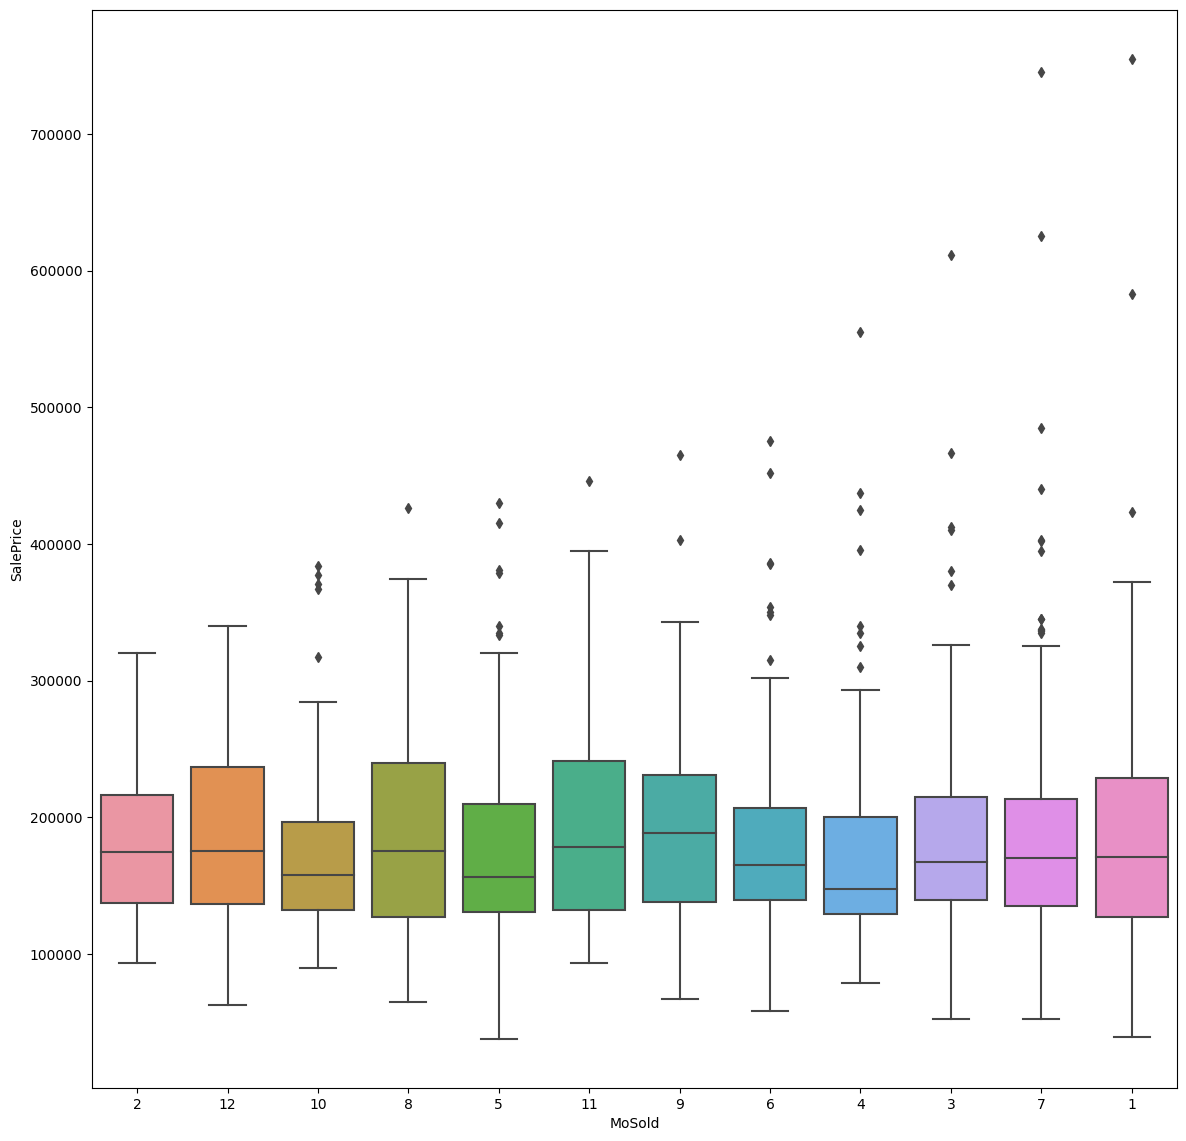

In [ ]:
sourted_month_sold = df.groupby('MoSold')['SalePrice'].max().sort_values().index.values

figure, axis = pyplot.subplots(figsize=(14,14))

sb.boxplot(x="MoSold",
           y='SalePrice',
           data=df,
           order = sourted_month_sold,
           ax=axis)

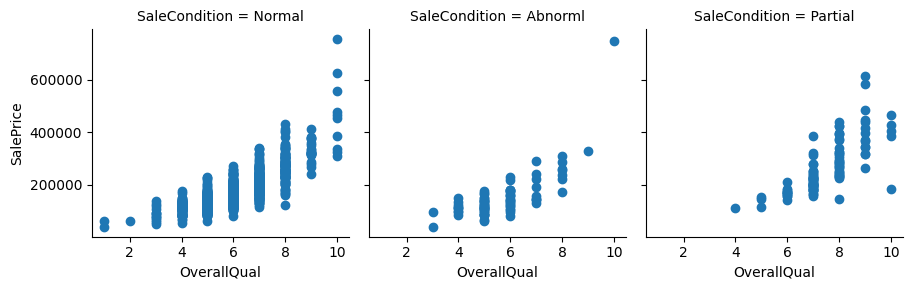

In [ ]:
conditional_plot = sb.FacetGrid(df,
                                col='SaleCondition',
                                col_wrap=4)

conditional_plot.map(pyplot.scatter,
                     'OverallQual',
                     'SalePrice')

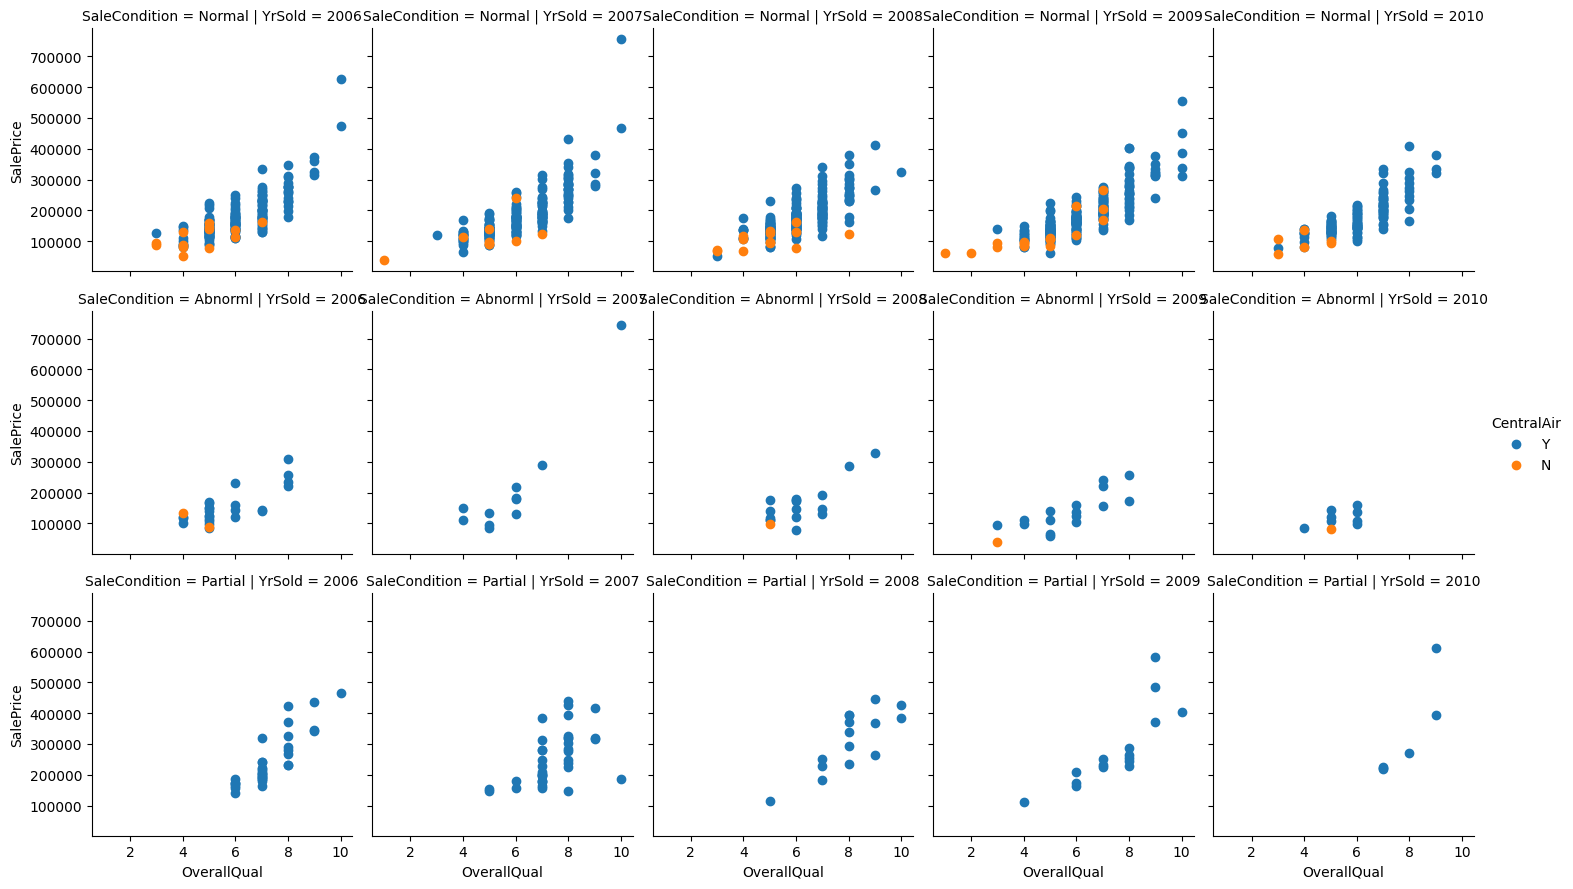

In [ ]:
conditional_plot = sb.FacetGrid(df,
                                col='YrSold',
                                row='SaleCondition',
                                hue='CentralAir')

conditional_plot.map(pyplot.scatter,
                     'OverallQual',
                     'SalePrice').add_legend()